# ASE Basic

Pythonで原子シミュレーションを進めていく際に便利なOSSライブラリとして、Atomic Simulation Environment: ASEがあります。<br/>
本章ではASEの基本的な使い方を紹介していきます。

 - Documentation: https://wiki.fysik.dtu.dk/ase/
 - gitlab: https://gitlab.com/ase/ase

## Atomsについて

ASEでは原子が複数個集まって作られる系を `Atoms` クラスで表現します。

 - https://wiki.fysik.dtu.dk/ase/ase/atoms.html

`Atoms`クラスは前章で説明した、原子シミュレーションに必要な構造を表現するための以下のような`attribute`(変数)を保持しています。
 - 各原子の元素種類
 - 座標値
 - 速度(運動量)
 - セル
 - 周期境界条件など

### Atomsの作成方法： 原子種・座標を直接指定

`Atoms`を作るための一番原始的な方法として、原子種とその座標値を直接指定する方法があります。<br/>
以下は、1つめのHがxyz座標値 `[0, 0, 0]`、2つめのHがxyz座標値 `[1.0, 0, 0]` に存在する水素分子H2を作る例です。

In [1]:
from ase import Atoms

atoms = Atoms("H2", [[0, 0, 0], [1.0, 0, 0]])

原子の可視化を行うこともできます。
ここでは、ASEのview 関数を用い、`nglviewer`というライブラリを用いて可視化を行っています。

`nglviewer` を用いると、３次元の原子構造を表示しながら、マウスでインタラクティブに操作することもできます。

可視化についての詳細は[Appendix_1_visualization.ipynb](./Appendix_1_visualization.ipynb)をご参照ください。

In [2]:
from ase.visualize import view
from pfcc_extras.visualize.view import view_ngl

#view(atoms, viewer="ngl")
view_ngl(atoms, representations=["ball+stick"], w=400, h=300)

以下のように、ASEを用いてpng静止画を描画することも可能です。

In [3]:
from ase.io import write
from IPython.display import Image

write("output/H2O.png", atoms, rotation="0x,0y,0z", scale=100)
Image(url='output/H2O.png', width=150)

以下は上記のプログラムを１行でできるようにした便利関数です。今後はこれを用います。

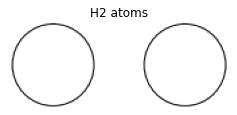

In [4]:
from pfcc_extras.visualize.ase import view_ase_atoms

view_ase_atoms(atoms, figsize=(4, 4), title="H2 atoms", scale=100)

元素記号 `symbols`の代わりに、原子番号を`numbers` として指定することも可能です。

In [5]:
co_atoms = Atoms(numbers=[6, 8], positions=[[0, 0, 0], [1.0, 0, 0]])
view_ngl(co_atoms, representations=["ball+stick"], w=400, h=300)

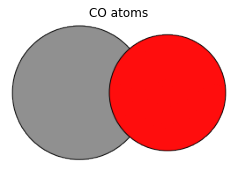

In [6]:
view_ase_atoms(co_atoms, figsize=(4, 4), title="CO atoms", scale=100)

周期境界条件を含む系を定義したい場合は、`cell` に周期情報を指定し、`pbc` にa軸b軸c軸それぞれに対して周期境界条件を適用するかどうかのON/OFFを指定することができます。

In [7]:
from ase import Atoms


na2_atoms = Atoms(
    symbols="Na2",
    positions=[[0, 0, 0], [2.115, 2.115, 2.115]],
    cell=[4.23, 4.23, 4.23],
    pbc=[True, True, True]
)

In [8]:
view_ngl(na2_atoms, w=400, h=300)

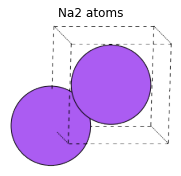

In [9]:
view_ase_atoms(na2_atoms, rotation="10x,10y,0z", figsize=(3, 3), title="Na2 atoms", scale=30)

### Atomsの持つattribute, method

<figure style="width:200px">
<img src="../assets/atoms.png"/>
</figure>

`atoms` はその系の情報を保持しており、Attribute や `get_XXX` 関数を通して参照することができます。

Attributeとは Atomsクラスの持つ変数のことで、 `atoms.xxx` と直接参照することが出来るものもあります。<br/>
関数を通してアクセスできる情報もあります。

以下は主要なAttributeや関数の返り値(numpy array としてのshapeがどの様になっているか)をまとめたものです。

 - Attribute
   - `symbols`: 元素種とその数をまとめたものを返す
   - `numbers`: 原子番号のarray。shapeは(N,)
   - `positions`: 各原子の座標値を示す。shapeは(N, 3)。 3はxyz座標を表す。
   - `cell`: ASEのCellをあつかうCellクラスで表現される。
     - Cellクラスに関して詳しくは後述する。[三斜晶系](https://ja.wikipedia.org/wiki/%E4%B8%89%E6%96%9C%E6%99%B6%E7%B3%BB)など一般的にはa, b, c軸のベクトルをそれぞれ表す(3, 3) の行列で表されるが、[直方晶](https://ja.wikipedia.org/wiki/%E7%9B%B4%E6%96%B9%E6%99%B6%E7%B3%BB)の場合はa, b, c軸の長さのみが(3,) で表現される。
   - `pbc`: 各方向に周期境界条件(Periodic Boundary Condition) があるかどうかを示す。
 - 関数
   - `get_masses()`: 各原子の質量を返す。
   - `get_momenta()`: 各原子に設定されている運動量を返す。
   - `len(atoms)`: Atoms全体の原子数`N`を返す。

In [10]:
print(f"symbols  : {atoms.symbols}")
print(f"positions: {atoms.positions}")
print(f"cell     : {atoms.cell}")
print(f"pbc      : {atoms.pbc}")

# Atomic numbers やMass はSymbolが指定されていれば自動で計算されます。
print(f"numbers  : {atoms.numbers}")
print(f"massess  : {atoms.get_masses()}")
print(f"momenta  : {atoms.get_momenta()}")
print(f"Numbers of atoms  : {len(atoms)}")

symbols  : H2
positions: [[0. 0. 0.]
 [1. 0. 0.]]
cell     : Cell([0.0, 0.0, 0.0])
pbc      : [False False False]
numbers  : [1 1]
massess  : [1.008 1.008]
momenta  : [[0. 0. 0.]
 [0. 0. 0.]]
Numbers of atoms  : 2


### 単位系

ASEでは、エネルギーの単位はeV (約 $1.602 \times 10^{-19}$ J)、座標系の単位はÅ ($1 \times 10^{-10}$ m)で扱われる事が多いです。<br/>
力や応力の単位はこれらの複合単位で、力についてはeV/Å、応力についてはeV/Å2です。chargeの単位は電荷素量です。

 - eV: [電子ボルト](https://ja.wikipedia.org/wiki/%E9%9B%BB%E5%AD%90%E3%83%9C%E3%83%AB%E3%83%88)
 - Å: [オングストローム](https://ja.wikipedia.org/wiki/%E3%82%AA%E3%83%B3%E3%82%B0%E3%82%B9%E3%83%88%E3%83%AD%E3%83%BC%E3%83%A0)
 - e: [電気素量](https://ja.wikipedia.org/wiki/%E9%9B%BB%E6%B0%97%E7%B4%A0%E9%87%8F)

[Tips] Jupyter 上で各クラス・関数のより詳細な情報を知りたい場合、　? を後ろにつけることでドキュメントの表示ができます。

In [11]:
Atoms?

Init signature:
Atoms(
    symbols=None,
    positions=None,
    numbers=None,
    tags=None,
    momenta=None,
    masses=None,
    magmoms=None,
    charges=None,
    scaled_positions=None,
    cell=None,
    pbc=None,
    celldisp=None,
    constraint=None,
    calculator=None,
    info=None,
    velocities=None,
)
Docstring:     
Atoms object.

The Atoms object can represent an isolated molecule, or a
periodically repeated structure.  It has a unit cell and
there may be periodic boundary conditions along any of the three
unit cell axes.
Information about the atoms (atomic numbers and position) is
stored in ndarrays.  Optionally, there can be information about
tags, momenta, masses, magnetic moments and charges.

In order to calculate energies, forces and stresses, a calculator
object has to attached to the atoms object.

Parameters:

symbols: str (formula) or list of str
    Can be a string formula, a list of symbols or a list of
    Atom objects.  Examples: 'H2O', 'COPt12', ['H', 